# Regions

In [1]:
import libs.plot
import libs.vars
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import warnings
import xarray

warnings.filterwarnings('ignore')

/home/users/woodward/.conda/envs/climate/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


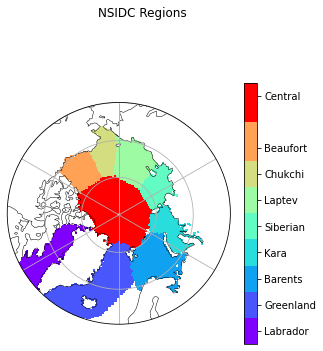

In [2]:
path_nsidc_mask = '_data/_cache/NSIDC_Regions_Masks_Ocean_nearest_s2d.nc'
nsidc_mask = xarray.open_mfdataset(paths=path_nsidc_mask, combine='by_coords').mask
nsidc_regions = [
    r for r in libs.vars.nsidc_regions() if len(r['values']) == 1
]

colormesh_kwargs = {
    'extend': 'neither',
    'cmap': 'rainbow',
    #'levels': 11,
    #'shading': 'auto', # NB change to 'gouraud' if Jaspy
    'vmin': 6,
    'vmax': 15,
    'x': 'longitude', 
    'y': 'latitude'
}

nsidc_mask = nsidc_mask.where(nsidc_mask != 14).where(nsidc_mask > 5).where(nsidc_mask < 16)

fig, subfigs = libs.plot.nstereo(
    [{ 'data': nsidc_mask, 'label': '' }],
    'NSIDC Regions',
    colormesh_kwargs,
    show_colorbar=False
)

values = [r['values'][0] for r in nsidc_regions]
cax = fig.colorbar(
    subfigs[0],
    ax=fig.axes[0],
    label='',
    location='right',
    #pad=0.05,
    shrink=0.8,
    spacing='uniform',
    values=values
)

cax.set_ticks(values)
cax.set_ticklabels([r['label'] for r in nsidc_regions])

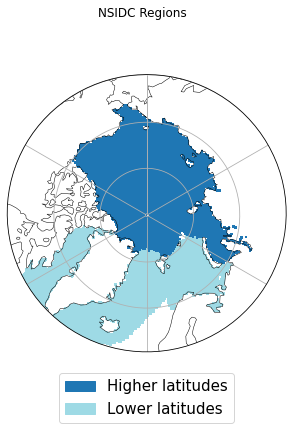

In [3]:
path_nsidc_mask = '_data/_cache/NSIDC_Regions_Masks_Ocean_nearest_s2d.nc'
nsidc_mask = xarray.open_mfdataset(paths=path_nsidc_mask, combine='by_coords').mask
nsidc_regions = [
    r for r in libs.vars.nsidc_regions() if len(r['values']) == 1
]

cmap = plt.cm.get_cmap('tab20', 2)
colormesh_kwargs = {
    'extend': 'neither',
    'cmap': cmap,
    #'shading': 'auto', # NB change to 'gouraud' if Jaspy
    'x': 'longitude', 
    'y': 'latitude'
}

region_lower = [r for r in libs.vars.nsidc_regions() if r['label'] == 'Lower Latitudes'][0]
region_higher = [r for r in libs.vars.nsidc_regions() if r['label'] == 'Higher Latitudes'][0]

nsidc_mask = nsidc_mask\
    .where(nsidc_mask != 14)\
    .where(nsidc_mask > 5)\
    .where(nsidc_mask < 16)\
    .where(
        np.isin(nsidc_mask.values, region_higher['values'], invert=True),
        6
    )\
    .where(
        np.isin(nsidc_mask.values, region_lower['values'], invert=True),
        8
    )

fig, subfigs = libs.plot.nstereo(
    [{ 'data': nsidc_mask, 'label': '' }],
    'NSIDC Regions',
    colormesh_kwargs,
    show_colorbar=False
)

fig.legend(
    [mpatches.Patch(color=cmap(b)) for b in np.arange(0, 2)],
    ['Higher latitudes', 'Lower latitudes'],
    fontsize=15,
    loc='lower center'
);